# NOTAS: 

El preprocesado adapta los datos al modelo

Las métricas evalúan el rendimiento del modelo final

El cross‑validation score evalúa la estabilidad del modelo

La comparación de scores sirve para elegir entre modelos


proposito del cross_validation score 
fase 1: Media del CV--->	Compara la media entre modelos para poder elegir el que  generaliza mejor?

fase 2: Entrenar ese modelo con todos los datos de entrenamiento

fase 3: Métricas en test--> compara metricas final en test para ver el 	Rendimiento final del modelo elegido


# PLAN

#######################################################     MODELADOS  ############################################################
  
- PREPARACION -  SEPARAR X /y
   -separacion para una unica feature
   - Separar features (X) y variable objetivo (y).
   - Puedes probar primero con una única feature para exploración rápida.
   - Importante: esta operación es antes de cualquier preprocesamiento
   - Separacion multiple. 

   

- PREPOCESAMIENTO ( con Pipeline) . Es importante que esta operacion se haga despues de dividir X , y
  estas son formas de trasformar los datos en Scikit Learn 
  - Todo el preprocesamiento se hace solo sobre X_train (el pipeline se ajusta con train).
  - Incluye: escalado, codificación de variables categóricas, imputación, etc.
  - Esto asegura que no haya data leakage del test set.

- ENTRENAMIENDO MODELOS
  - cargar modelos que se quiern utilizar (LogisticRegression, RandomForest, SVM, etc.)
  - entrena el modelo ( X_train y y_train) 
  - calcular metricas de entrenamiento para ver desempeño inicial.
  - Aquí todavía no decides cuál es el mejor modelo; solo observas desempeño inicial.
  
  
- VALIDACION CRUZADA ( SE ELIGE EL MODELO. es implicito la evaluacion de rendimiento)
   - Se hace SOLO CON  con X_train / y_train para decidir el modelo ganador y ajustar hiperparámetros.
   - ver rapidamente OVERFITTING Y UNDERFITTING   
   - se valorara el rendimiento con metricas de entrenamiento vs metricas de CV 
       Error de Train mucho menor << que CV  --->  OVERFITTING ( el modelo aprendio demasiado los datos de train y no generaliza)       
       Error de Train  ≈ CV bajo --> UNDERFITTING ( el modelo es demasiado simple)
       Error de Train  ≈ CV alto --> MODELO BIEN AJUSTADO 
       
  - Valoración de rendimiento promedio en CV (cross_val_score).
  - metrica de rendimiento promedio ( CV )

- AJUSTE DE HIPERPARAMETROS  ( si es necesario)
   - Con GridSearchCV o RandomizedSearchCV sobre train usando CV
   - Esto produce el mejor modelo final listo para evaluación en test.

- EVALUACION FINAL
    - Entrenar el modelo seleccionado sobre todo X_train (ya con pipeline y mejores hiperparámetros).

- EVALUCION FINAL EN TEST ( es implicito al evaluacion de rendimiento)
  - Predecir con X_test.
  - Calcular métricas finales:
      Accuracy, F1, Precision/Recall, Confusion Matrix
  - Esta evaluación es la única que refleja desempeño real en datos no vistos.
  - evaluacion rendimiento en test
  - metrica de rendimiento final.
  
- INTERPRETACION - EVALUACION FINAL
  - Analizar: 
     Variables más importantes (feature importance si aplica)
     Patrones de error (dónde falla más)
     Posibles sesgos o problemas de generalización    

- CONCLUSIONES 
  Resumen de hallazgos:
     Qué modelo funcionó mejor
     Qué features son más relevantes
     Posibles mejoras futuras 

# Tareas a realizar
---
1. Introduccion
   - Contexto
   - Objectivo: Que queremos predecir y porques
    
2. Cargar el *dataset diamond* <https://www.kaggle.com/code/rolandmueller/seaborn-diamonds-2-11-2020/input> con Pandas
    
3. Realizar una **exploracion estadistica descriptiva** de los datos con Panda
   - Descripcion de las variables.
   - Correlacion 
   - Valores unicos ( Unique) , mas frecuentes ( top ) , frecuencia de valor mas comun (freq).
   - Inspeccion de balanceo varibales categoricas.
  
4. EDAS (Exploratory Data Analisys)   
   - Detectar valores nulos.
   - Corregir valores nulos.
   - Corregir tipos de datos.
   - Eliminar duplicados.
   - Identificar Outliers y tratarlos.
  
5. Visualizacion 
   - Univariante
   - Bivariante
   - Multivariante
  
6. Modelado
   - Probar *varios* modelos de Scikit Learn , para predecir la columna tip del dataset
   - Escalar las columnas numericas
   - Particionar los datos con *train_test_split*
   - Ver el mejor modelo

# Carga y Limpieza


- Disponemos de un Data Set compuesto por 10 variables y 50.000 registos aproximadamente.

- El objetivo es predecir la variable cut (corte) que representa la variable de calidad de corte ( Regular , Buena , Muy Buena, Premium , Ideal ) .

- Consideraremos una metrica de peso el ' recall '  para priorizar el posible costo de no detectar un positivo ( falso negativo) es alto, por clasificar un diamante con calidad baja.


Sí — puede ser lógico. Puntos clave:

Pero no basta solo recall: si aumentas recall sin controlar precision, subirán falsos positivos y eso también tiene coste (operacional, reputacional, económico).
Recomendado: cuantificar costes de FN vs FP y optimizar una métrica de utilidad esperada (cost matrix / expected profit). Técnicas prácticas:
Usar Fβ con β>1 para priorizar recall sobre precision.
Evaluar curvas Precision–Recall y seleccionar umbral que maximice beneficio económico.
Calcular métricas basadas en coste (loss ponderado) o función de utilidad empresarial.
Concluir: si el coste de perder un positivo por producto caro supera claramente el coste de FP, prioriza recall pero valida la decisión con una optimización de coste/beneficio y análisis de umbral

### Contexto

- El objectivo de la actividdad es predecir la variable categorica 'cut ' que representa la calidad del corte del diamante.

- La solucion del problema será de tipo CLASIFICACION y se resolverá eligiendo el mejor modelo aplicando distintos algoritmos y elegiendo basandonos en las metricas de clasidicacion.  

### Import

- Celda reservada para la carga de modelos y librerias necesarrias para el desarrollo de la actividad

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# TRAIN  -TEST - METRICAS
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report,balanced_accuracy_score)

# PREPROCESAMIENTO 
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler,RobustScaler
from sklearn.impute import SimpleImputer,KNNImputer


# pipeline numéricas

# MODELOS 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


### Cargar DataSet 

- Cargamos el DataSet y mostramos las primeras 20 filas para supervisar el Data
- Mostramos los tipos de cada feature 

In [63]:
df = pd.read_csv('diamond.csv')
print(df.sample(n=5))

df.shape 

       Unnamed: 0  carat      cut color clarity  depth  table  price     x  \
33740       33741   0.31    Ideal     D    VVS2   62.2   54.0    840  4.34   
42298       42299   0.32  Premium     H     VS2   61.4   60.0    505  4.39   
12829       12830   1.02     Fair     E     VS2   66.6   57.0   5350  6.09   
17452       17453   1.01     Good     F     VS1   63.3   60.0   6999  6.32   
30291       30292   0.34     Good     F     SI2   63.3   54.0    447  4.46   

          y     z  
33740  4.38  2.71  
42298  4.41  2.70  
12829  6.14  4.07  
17452  6.35  4.01  
30291  4.48  2.83  


(53940, 11)

###  Descripcion FEATURE

In [3]:
data = {
    "Variable": [
        "carat", "cut", "color", "clarity", "depth",
        "table", "price", "x", "y", "z"
    ],
    "Descripción": [
        "Peso del diamante en quilates",
        "Calidad del corte",
        "Color del diamante (D mejor, J peor)",
        "Claridad del diamante",
        "Profundidad total = 2*z/(x+y)",
        "Anchura de la parte superior relativa al punto más ancho",
        "Precio del diamante en dólares estadounidenses",
        "Longitud en mm",
        "Anchura en mm",
        "Profundidad en mm"
    ],
    "Rango / Categorías": [
        "0.2 - 5.01",
        "Fair, Good, Very Good, Premium, Ideal",
        "D, E, F, G, H, I, J",
        "I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF",
        "43 79",
        "43 - 95",
        "326 - 18 823",
        "0 - 10.74",
        "0 - 58.9",
        "0 - 31.8"
    ]
}

df_info = pd.DataFrame(data)
df_info


,Variable,Descripción,Rango / Categorías
0,carat,Peso del diamante en quilates,0.2 - 5.01
1,cut,Calidad del corte,"Fair, Good, Very Good, Premium, Ideal"
2,color,"Color del diamante (D mejor, J peor)","D, E, F, G, H, I, J"
3,clarity,Claridad del diamante,"I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF"
4,depth,Profundidad total = 2*z/(x+y),43 79
5,table,Anchura de la parte superior relativa al punto...,43 - 95
6,price,Precio del diamante en dólares estadounidenses,326 - 18 823
7,x,Longitud en mm,0 - 10.74
8,y,Anchura en mm,0 - 58.9
9,z,Profundidad en mm,0 - 31.8


In [4]:
# comprobamos las columnas del data frame
df.columns.to_list()

['Unnamed: 0',
 'carat',
 'cut',
 'color',
 'clarity',
 'depth',
 'table',
 'price',
 'x',
 'y',
 'z']

- eliminamos columnas innecesarias

In [5]:
# comprobamos antes de eliminar 
print("Columnas a eliminar:", df.columns[:1].tolist())

Columnas a eliminar: ['Unnamed: 0']


In [6]:
# hacemos una copia del df original y realizamos el drop de la columna que no queremos y mostramos el resultado
df_copy = df.copy()
df_unnamed=df_copy.drop(df_copy.columns[:1], axis=1)
df_unnamed.columns.to_list()


['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

- eliminamos la primera columna porque no aporta valor y asi mejoramos el futuro entrenamiento.

### Redimensionamiento dataset
- Generamos un nuevo df reducido para evitar complejidad computacional.A partir de ahora nuestro df base será el df_reduced 

In [64]:
df_reduced=df_unnamed.sample(5000,random_state=42)

df_display = df_reduced.head().copy() 
df_display = df_display.reset_index(drop=True) 
df_display

#print(df_reduced.head())

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.24,Ideal,G,VVS1,62.1,56.0,559,3.97,4.00,2.47
1,0.58,Very Good,F,VVS2,60.0,57.0,2201,5.44,5.42,3.26
2,0.40,Ideal,E,VVS2,62.1,55.0,1238,4.76,4.74,2.95
3,0.43,Premium,E,VVS2,60.8,57.0,1304,4.92,4.89,2.98
4,1.55,Ideal,E,SI2,62.3,55.0,6901,7.44,7.37,4.61


### Inspeccion del data set

- tipos de datos

In [8]:
# 
print(
    f"DATA FRAME ORIGINAL\n"
    f"Numero de filas y columnas:{df.shape}\n"
    f"Numero total de elementos : {df.size}\n "
    )
print(
    f"DATA FRAME REDUCIDO \n"
    f"Numero de filas y columnas:{df_reduced.shape}\n"
    f"Numero total de elementos : {df_reduced.size}\n "
    )


print(df_reduced.dtypes.to_frame(name="TIPOS DE DATOS"))

DATA FRAME ORIGINAL
Numero de filas y columnas:(53940, 11)
Numero total de elementos : 593340
 
DATA FRAME REDUCIDO 
Numero de filas y columnas:(5000, 10)
Numero total de elementos : 50000
 
        TIPOS DE DATOS
carat          float64
cut                str
color              str
clarity            str
depth          float64
table          float64
price            int64
x              float64
y              float64
z              float64


  ### Revision NULOS - VALORES OCULIOS -  ESPACIOS EN BLANCOS
  - comprobamos si hay VALORES NULOS  en todo el dataframe original
  - comprobamos si hay ESPACIOS EN BLANCO en todo el dataframe original
  - comprobamos si hay VALORES OCULTOS  en todo el dataframe original

In [66]:
df_nulos = pd.DataFrame({    
    'nulos': df_reduced.isna().sum()                                                        # muestra la suma de los nulos o faltantes contenidos en las columnas 
})
df_espacios = pd.DataFrame({
    "espacios": df_reduced.apply(lambda col: col.astype(str).str.strip().eq("").sum())      # muestra la suma de celdas con espacios vacios
})

valores_ocultos = ["", " ", "NA", "N/A", "na", "null", "None", "?", "."]

df_ocultos = pd.DataFrame({ 
    'ocultos': df_reduced.apply(lambda col: col.astype(str).isin(valores_ocultos).sum()) })  #  trasforma todas las columnas en string para poder comparar con valores_ocultos 

df_Nan= pd.concat([df_nulos, df_espacios, df_ocultos], axis=1)
df_Nan

,nulos,espacios,ocultos
carat,0,0,0
cut,0,0,0
color,0,0,0
clarity,0,0,0
depth,0,0,0
table,0,0,0
price,0,0,0
x,0,0,0
y,0,0,0
z,0,0,0


- no se detectan valores nulos , ni valores ocultos ni espacios en blancos

In [10]:
# duplicados por columna (valores repetidos dentro de cada columna)
df_duplicados_col = pd.DataFrame({'duplicados': df.apply(lambda col: col.duplicated().sum())})

# filas duplicadas totales 
filas_duplicadas = int(df.duplicated().sum())

print(f"\nFilas duplicadas totales: {filas_duplicadas}")


Filas duplicadas totales: 0


# EDAs

### Tabla de estadisticos principal para ver centralidad y dispercion

In [11]:
tabla_basica = df_reduced.describe(include='all').rename(index={
    'count': 'Total',
    'unique':'Valor unicos',
    'top': 'Valor + frecuente',
    'freq' :'Valor + comun',
    'mean' :'Media',
    'std':'Desviacion',
    'min': 'Valor minimo',
    'max': 'Valor maximo'
})

print(tabla_basica)


                         carat    cut color clarity        depth        table  \
Total              5000.000000   5000  5000    5000  5000.000000  5000.000000   
Valor unicos               NaN      5     7       8          NaN          NaN   
Valor + frecuente          NaN  Ideal     G     SI1          NaN          NaN   
Valor + comun              NaN   1953  1044    1182          NaN          NaN   
Media                 0.797118    NaN   NaN     NaN    61.783100    57.438580   
Desviacion            0.483612    NaN   NaN     NaN     1.436638     2.267361   
Valor minimo          0.200000    NaN   NaN     NaN    54.400000    49.000000   
25%                   0.390000    NaN   NaN     NaN    61.100000    56.000000   
50%                   0.700000    NaN   NaN     NaN    61.900000    57.000000   
75%                   1.040000    NaN   NaN     NaN    62.500000    59.000000   
Valor maximo          4.010000    NaN   NaN     NaN    71.200000    73.000000   

                          p

Report rapido sobre columnas numericas:
- en 'caract' hay cierta variacion , porque el valor de desviacion es bastante elevado respecto al valor medio, sin embargo la media y mediana coinciden. Presenta un valor maximo muy elevado
- en 'depth' y 'table' la desviacion es muy baja respecto al valor medio y la media y mediana son practicamente identicas.
- en 'price' hay mucha desviacion , con valores maximo muy grande y cierta variacion entre media y mediana sugeriendonos que pueden haber outliers
- en 'X' y 'Y' la desviacion no es grade y la media y mediana son practicamente identicas.
- en 'Z' la dessviacion es aun menor y la media y mediana coinciden.
- las variables cualitativas no parecen bien balanceadas, sobretodo en el caso de 'cut' cuyo valor mas comun es bastante elevado respecto al total (1974 / 5000 ), viendo ademas que hay nº 5 valores unicos y tambien en 'clarity' ( 1203/5000) con nº8 valores unicos.

,conteo,procentaje
cut,,
Ideal,1953,39.06
Premium,1312,26.24
Very Good,1108,22.16
Good,465,9.30
Fair,162,3.24


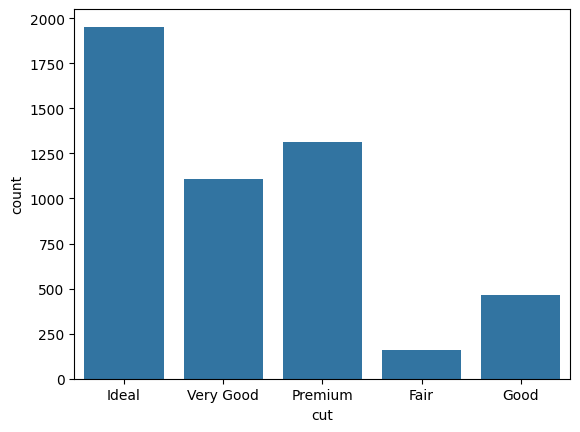

In [12]:
# COMPROBAR BALANCEO      de la variable respuesta y 
df_balanceo = pd.DataFrame({
    "conteo": df_reduced['cut'].value_counts(),
    "procentaje":(df_reduced['cut'].value_counts(normalize=True)*100).round(2)
})
sns.countplot( df_reduced, x ='cut')
df_balanceo

Efectivamente podemos apreciar que los datos no estan balanceados.

### Graficos Var/Numericas

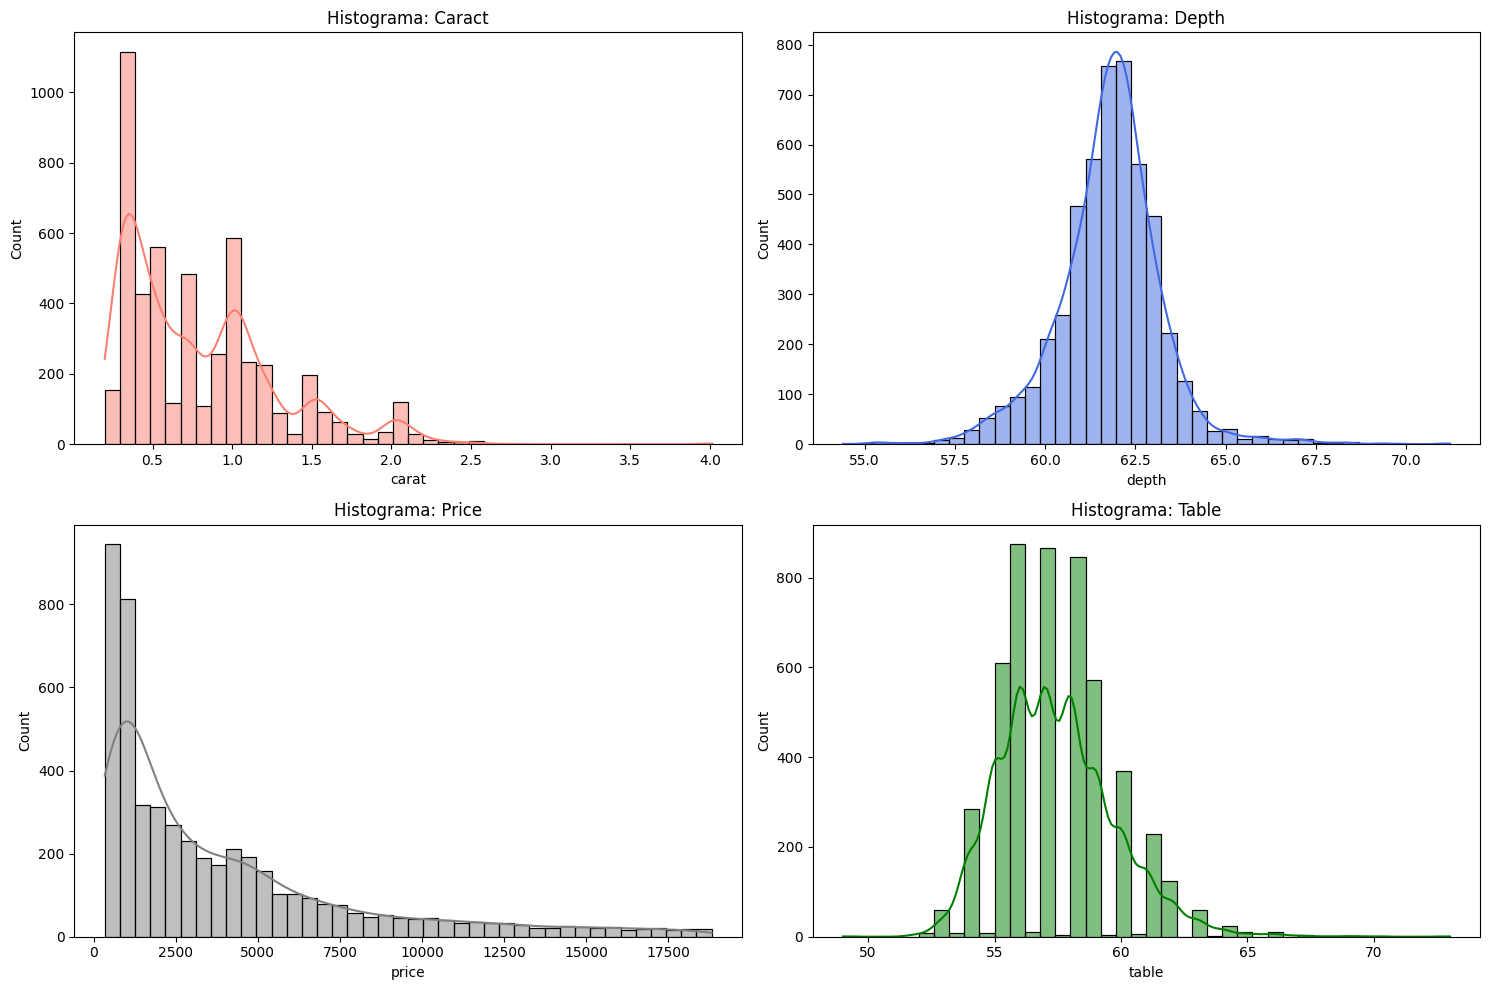

In [13]:
plt.figure(figsize=[15,10])

# Subplot CARACT
plt.subplot(2,2,1)
sns.histplot(data=df_reduced, x='carat', bins=40, kde=True, color='salmon')
plt.title('Histograma: Caract')

# Subplot DEPTH
plt.subplot(2,2,2)
sns.histplot(data=df_reduced, x='depth', bins=40, kde=True, color='royalblue')
plt.title('Histograma: Depth')

# Subplot PRICE
plt.subplot(2,2,3)
sns.histplot(data=df_reduced, x='price', bins=40, kde=True, color='gray')
plt.title('Histograma: Price')

# Subplot TABLE
plt.subplot(2,2,4)
sns.histplot(data=df_reduced, x='table', bins=40, kde=True, color='green')
plt.title('Histograma: Table')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Distribucion Profundidad')

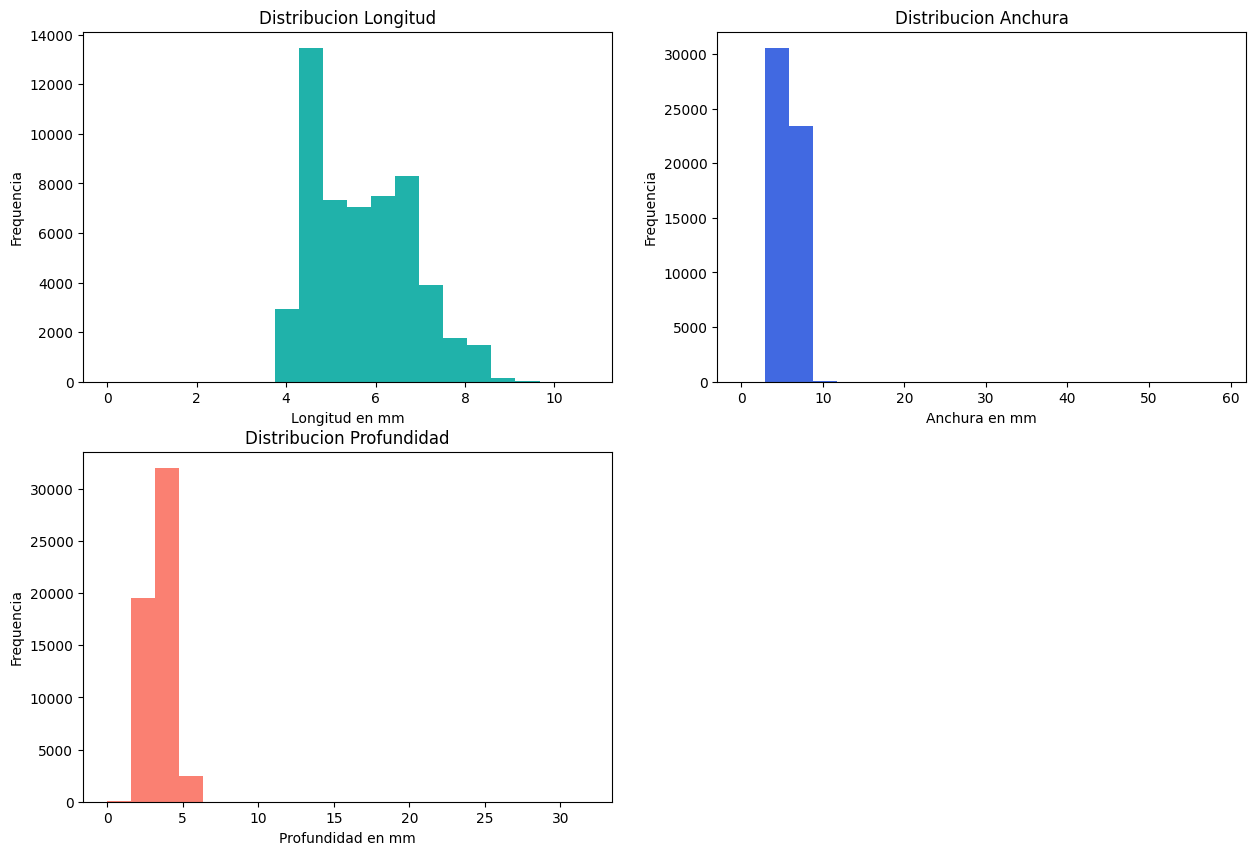

In [14]:
plt.figure(figsize=[15,10])

# Subplot X- Longitud
plt.subplot(2,2,1)
plt.hist(df['x'],bins=20,color='lightseagreen')
plt.xlabel('Longitud en mm')
plt.ylabel('Frequencia')
plt.title('Distribucion Longitud')

# Subplot V- ANCHURA
plt.subplot(2,2,2)
plt.hist(df['y'],bins=20,color='royalblue')
plt.xlabel('Anchura en mm')
plt.ylabel('Frequencia')
plt.title('Distribucion Anchura')

# Subplot Z-profunidad
plt.subplot(2,2,3)
plt.hist(df['z'],bins=20,color='salmon')
plt.xlabel('Profundidad en mm')
plt.ylabel('Frequencia')
plt.title('Distribucion Profundidad')

#### visulializacion graficas de las variables numericas

C:\Users\marco\AppData\Local\Temp\ipykernel_26036\1079333185.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


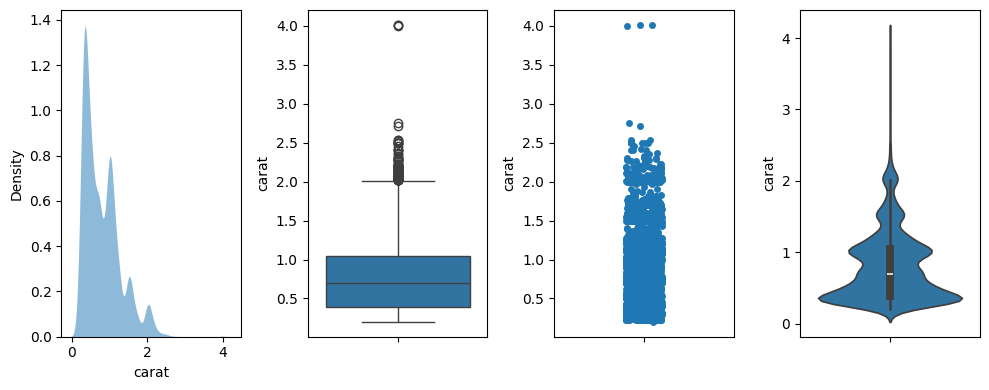

C:\Users\marco\AppData\Local\Temp\ipykernel_26036\1079333185.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


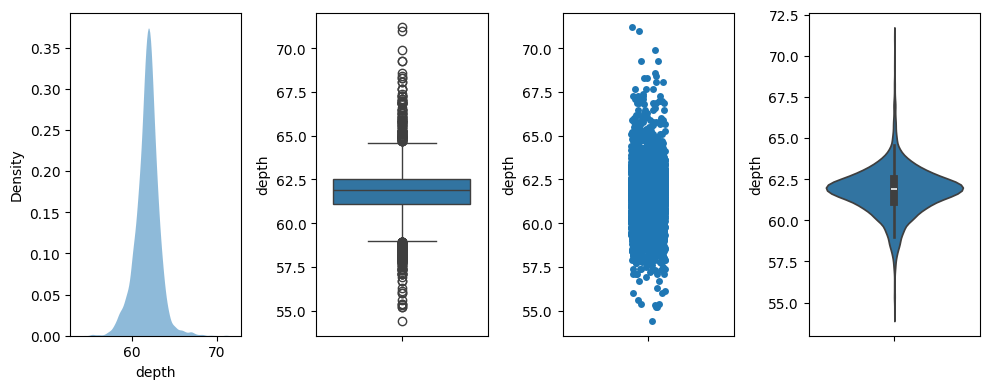

C:\Users\marco\AppData\Local\Temp\ipykernel_26036\1079333185.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


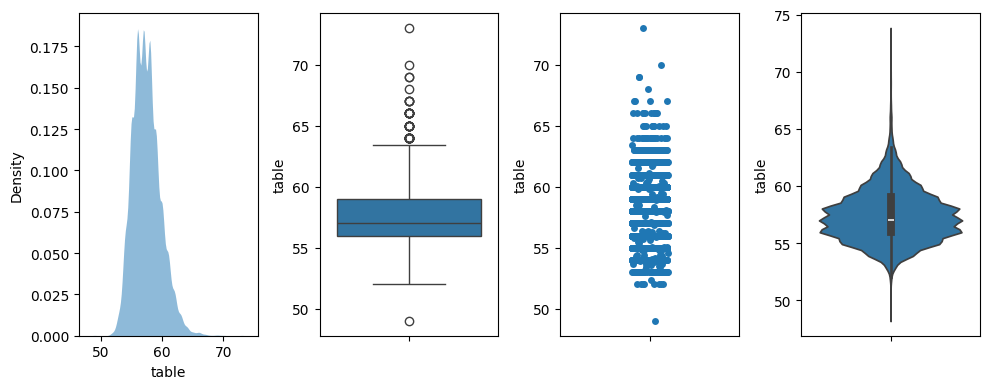

C:\Users\marco\AppData\Local\Temp\ipykernel_26036\1079333185.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


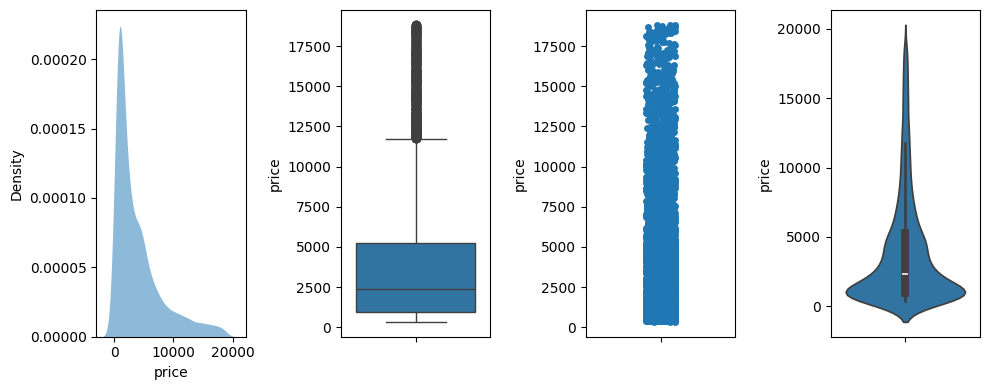

C:\Users\marco\AppData\Local\Temp\ipykernel_26036\1079333185.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


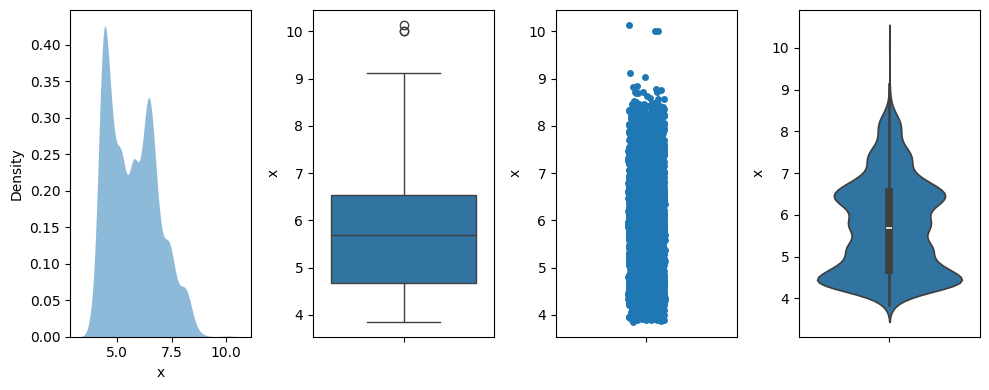

C:\Users\marco\AppData\Local\Temp\ipykernel_26036\1079333185.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


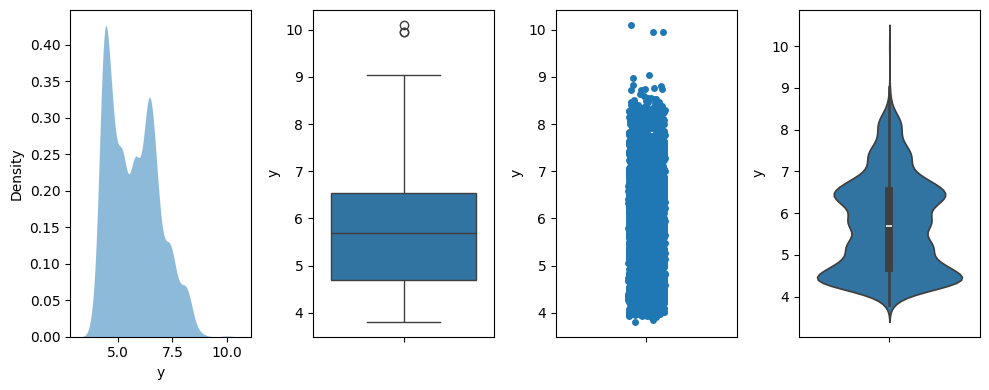

C:\Users\marco\AppData\Local\Temp\ipykernel_26036\1079333185.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


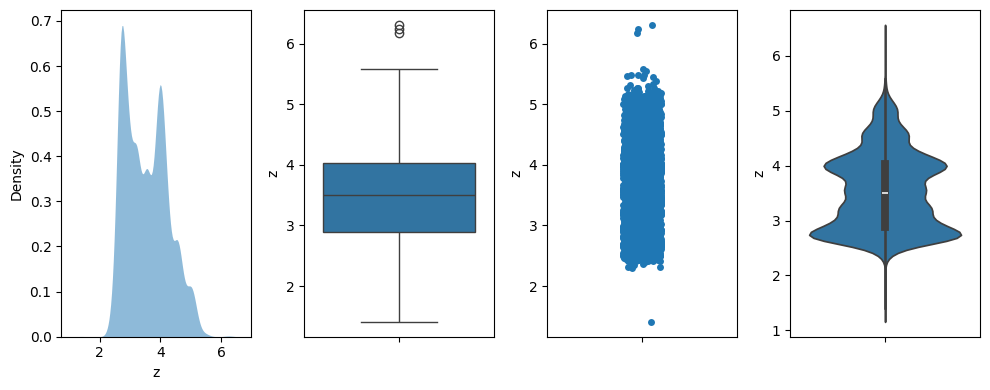

In [15]:
tipos_variables = pd.DataFrame(df_reduced.dtypes)

sel_columnas = (tipos_variables[0]=='int64') | (tipos_variables[0]=='float64')
var_num = df_reduced.columns[sel_columnas]

for i in var_num:
   fig, axs = plt.subplots(ncols=4, figsize=(10, 4))
   sns.kdeplot(
      data=df_reduced, x=i,
      fill=True, common_norm=False, palette="crest",
      alpha=.5, linewidth=0, ax=axs[0])
   sns.boxplot(data=df_reduced,   y=i,   ax=axs[1])
   sns.stripplot(data=df_reduced, y= i, ax=axs[2])
   sns.violinplot(data=df_reduced, y=i, ax=axs[3])
   
   fig.tight_layout()
   plt.show()

#### visualizacion BOX-PLOT

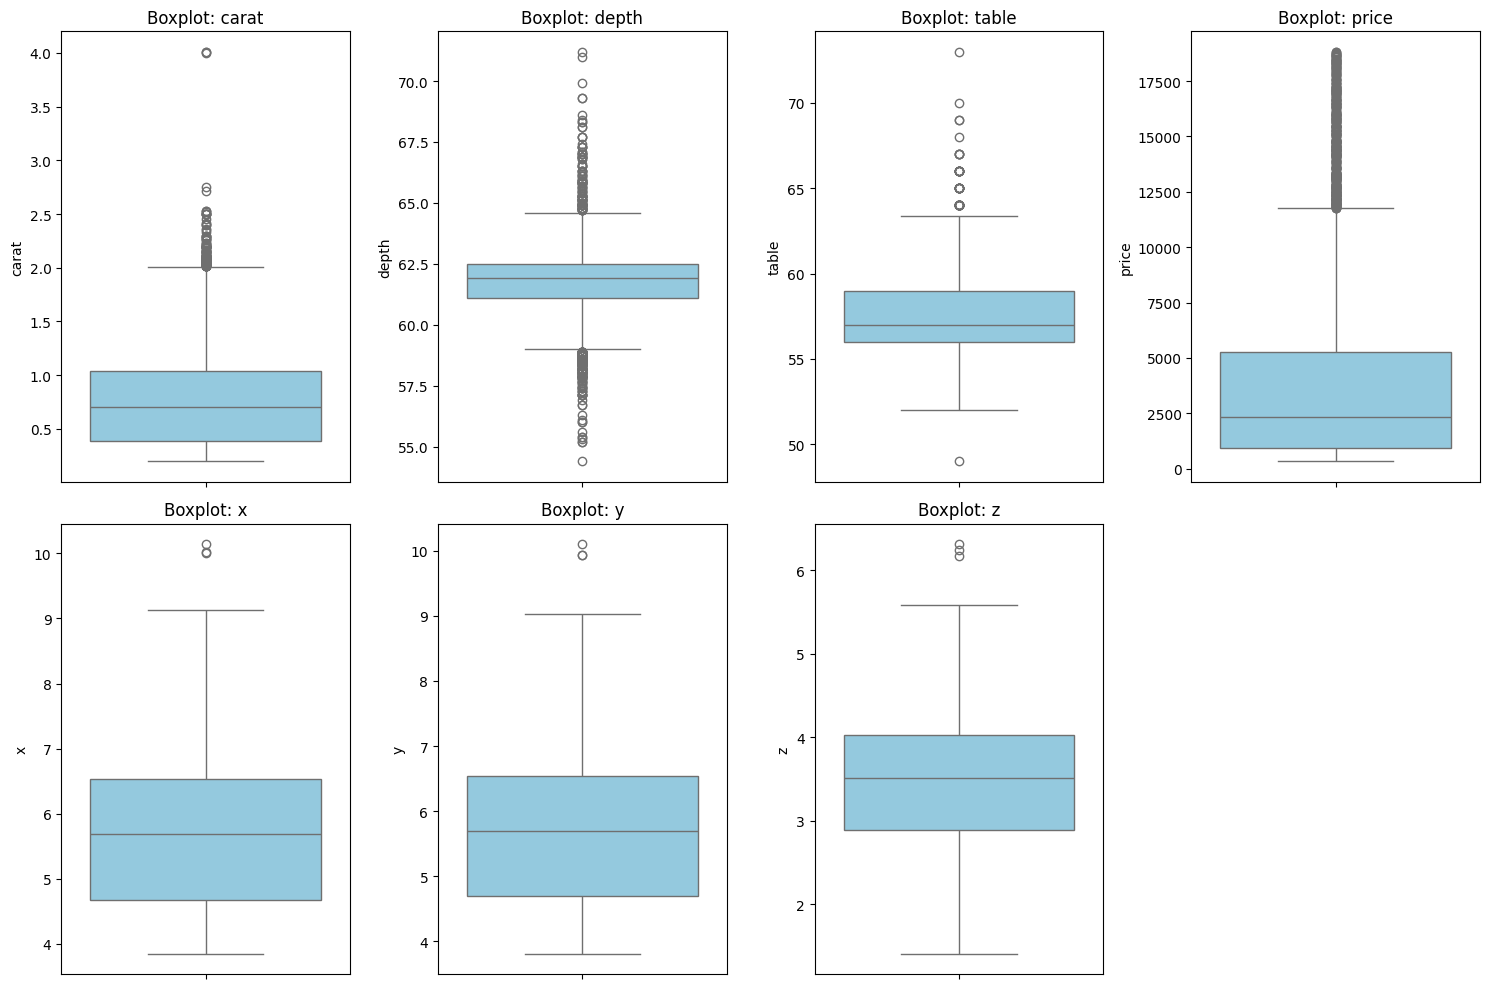

In [16]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df_reduced, y=col, color='skyblue')
    plt.title(f'Boxplot: {col}')

plt.tight_layout()
plt.show()

- tenemos la presencias de muchos valores outliers, que tendremso que evaluar y considerar. 
  Tendriamos que valorar si son errores en los datos ( en este caso eliminar) o si son valores extremos.

In [17]:
# función para cuantificar outliers (IQR)
def contar_outliers_iqr(df_reduced, cols=None, factor=1.5):
    cols = cols if cols is not None else df_reduced.select_dtypes(include=[np.number]).columns
    res = {}
    for c in cols:
        q1 = df_reduced[c].quantile(0.25)
        q3 = df_reduced[c].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - factor * iqr
        upper = q3 + factor * iqr
        mask = (df_reduced[c] < lower) | (df_reduced[c] > upper)
        res[c] = {'outliers / ud': int(mask.sum()), '%': round(mask.mean()*100,2)}   # mask (:boolean (si-no outliers)) / cuenta cuantos outlieres hay  # pct es el procentaje 
    return pd.DataFrame(res).T

contar_outliers_iqr(df_reduced, cols=['price','carat','table', 'depth'])

,outliers / ud,%
price,352.0,7.04
carat,134.0,2.68
table,55.0,1.10
depth,291.0,5.82


- el porcentaje de outlien no es relevante. 

In [18]:
def mostrar_extremos(df_reduced, cols, n=10):
    for c in cols:
        print(f"\nColumna: {c}")
        print("  Más pequeños:")
        display(df_reduced.nsmallest(n, c)[[c]])
        print("  Más grandes:")
        display(df_reduced.nlargest(n, c)[[c]])

def detectar_percentil(df_reduced, cols, lower_pct=0.001, upper_pct=0.999):
    flags = {}
    n = len(df_reduced)
    for c in cols:
        lo = df_reduced[c].quantile(lower_pct)
        hi = df_reduced[c].quantile(upper_pct)
        mask = (df_reduced[c] < lo) | (df[c] > hi)
        flags[c] = df_reduced.loc[mask, [c]]
    return flags

def reglas_logicas(df):
    # valores imposibles o sospechosos
    masks = {}
    masks['dim_negativas_o_cero'] = df[(df[['x','y','z']]<=0).any(axis=1)]
    # volumen vs carat: volumen = x*y*z; vigilar ratios extremos
    df2 = df.copy()
    df2['volume'] = df2['x'] * df2['y'] * df2['z']
    df2['vol_por_carat'] = df2['volume'] / (df2['carat'].replace(0, np.nan))
    lo, hi = df2['vol_por_carat'].quantile([0.001, 0.999])
    masks['vol_por_carat_extremo'] = df2[(df2['vol_por_carat']<lo) | (df2['vol_por_carat']>hi)]
    # precio extremadamente bajo/alto relativo a carat
    df2['price_por_carat'] = df2['price'] / df2['carat'].replace(0, np.nan)
    plo, phi = df2['price_por_carat'].quantile([0.001, 0.999])
    masks['price_por_carat_extremo'] = df2[(df2['price_por_carat']<plo) | (df2['price_por_carat']>phi)]
    return masks

# Uso recomendado sobre la muestra:
cols_num = ['price','carat','depth','table']
mostrar_extremos(df_reduced, cols_num, n=10)




Columna: price
  Más pequeños:


,price
4,335
6,336
28265,358
28266,360
31595,367
28289,367
34922,373
34921,373
34942,378
38252,380


  Más grandes:


,price
27749,18823
27745,18803
27737,18784
27726,18745
27687,18718
27673,18691
27668,18678
27665,18659
27661,18640
27647,18575



Columna: carat
  Más pequeños:


,carat
31595,0.20
38277,0.21
40271,0.23
47659,0.23
42277,0.23
16730,0.23
34942,0.23
37597,0.23
34278,0.23
47662,0.23


  Más grandes:


,carat
25999,4.01
25998,4.01
26444,4.00
24784,2.75
27016,2.71
27522,2.53
26455,2.53
27239,2.52
27550,2.50
25627,2.50



Columna: depth
  Más pequeños:


,depth
38153,54.4
22572,55.2
35662,55.2
42987,55.3
1608,55.4
53757,55.4
51391,55.6
36958,56.0
1227,56.0
51139,56.1


  Más grandes:


,depth
42104,71.2
17717,71.0
49495,69.9
43480,69.3
1438,69.3
46784,68.6
49538,68.4
19785,68.3
6020,68.3
385,68.1



Columna: table
  Más pequeños:


,table
22701,49.0
15230,52.0
38834,52.0
52651,52.0
25607,52.0
5114,52.0
53688,52.0
31863,52.0
10676,52.0
45495,52.4


  Más grandes:


,table
51391,73.0
314,70.0
18124,69.0
40211,69.0
23292,68.0
53660,67.0
1227,67.0
51153,67.0
9129,67.0
1319,66.0


#### Descripcion MULTIVARIADA [ correlacion entre variables]

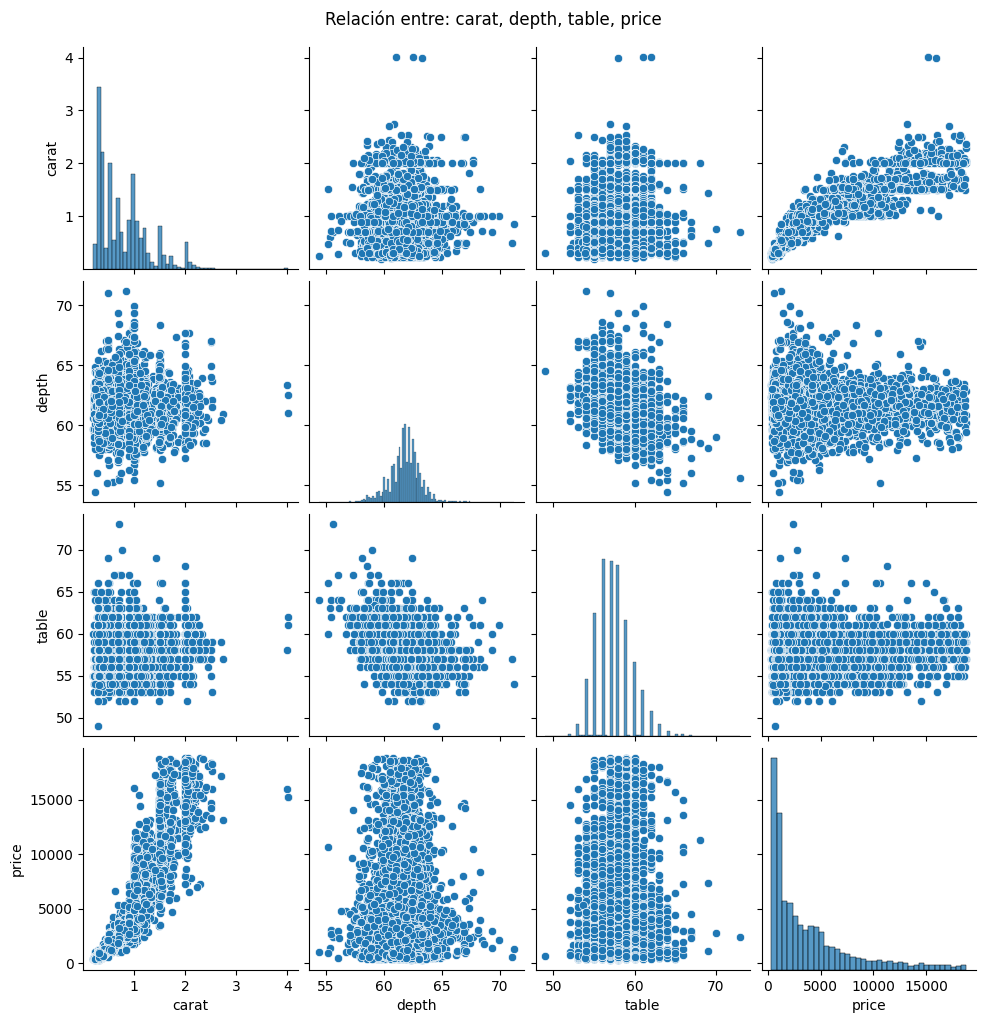

In [19]:
sns.pairplot(data=df_reduced, vars=['carat', 'depth', 'table', 'price'], diag_kind='hist', height=2.5)
plt.suptitle('Relación entre: carat, depth, table, price', y=1.02)
plt.show()

- CONLUSIONES: 
  - 'price' y 'caract' muestran un correlacion positiva pero no lineal. EN la cola superior se expande, posibles presencia de outliers. La distribucion es sesgada a la derecha
  - 'depth' y 'table' presentan relacion debil con 'price '
  - 'depht' y 'table' y 'carat' y 'table' presentan una estructura tipo cluster, con muy poca tendenicas linear.
  - ' caract' y ' depht' presentan una estructura tipo cluster, con muy poca tendenicas linear.
  - Conclusion price y caract tiene la "mejor" correlacion.

#### Headmap

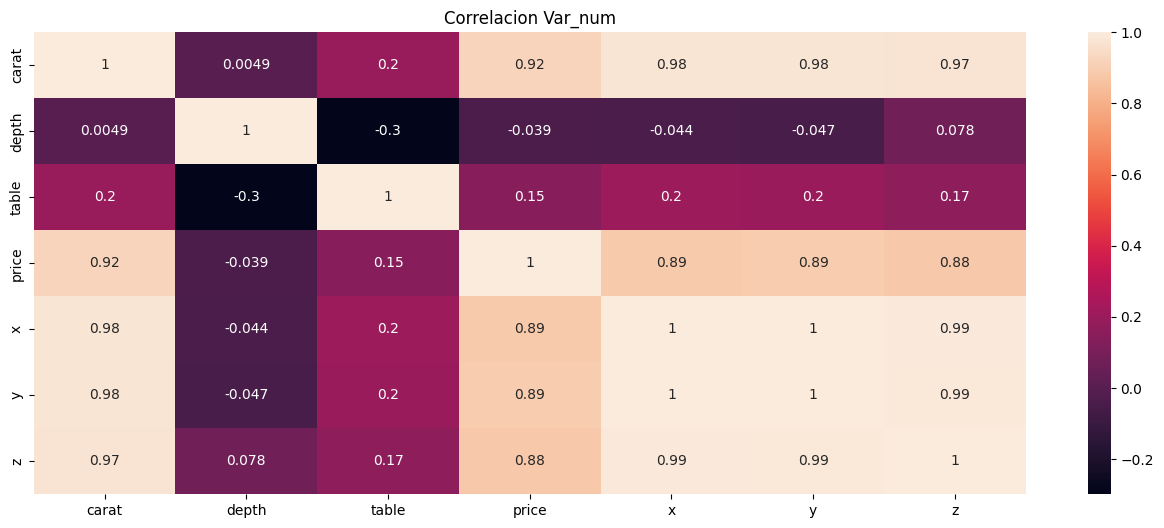

In [51]:
X = df_reduced[var_num]  # selecciono solo las variables nueericas

plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(X.corr(),annot=True)
heatmap.set_title('Correlacion Var_num')

plt.show()

- hay presencia de multicolinealidad alta entre las mismas  x , y , z  y  tambien respecrto a caract, ademas de caract frente a price.

### Graficos Var/Categorica

#### Visualizacion CLARITY
   - tabla conteo y porcentaja
   - histograma
   - Heatmap  con 'cut'

,clarity,procentaje
clarity,,
SI1,1182,23.64
VS2,1166,23.32
SI2,868,17.36
VS1,758,15.16
VVS2,455,9.10
VVS1,345,6.90
IF,142,2.84
I1,84,1.68


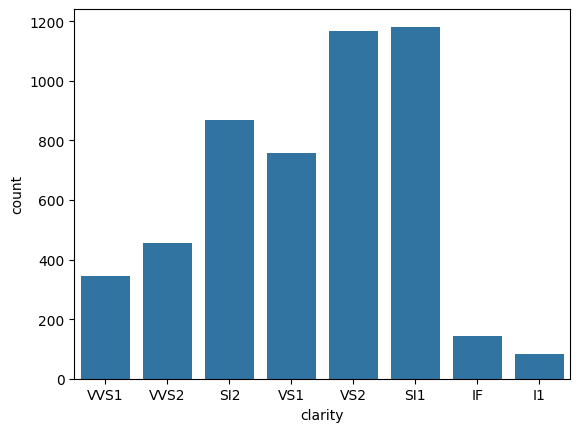

In [21]:
df_clarity = pd.DataFrame({
    "clarity": df_reduced['clarity'].value_counts(),
    "procentaje":(df_reduced['clarity'].value_counts(normalize=True)*100).round(2)
})
sns.countplot( df_reduced, x ='clarity')
df_clarity



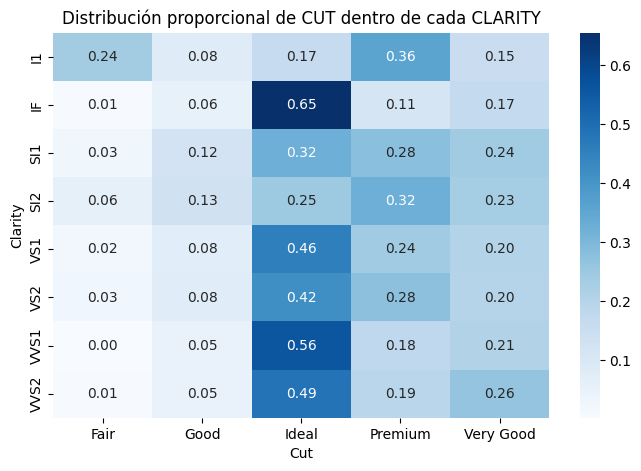

In [22]:
tabla = pd.crosstab(df_reduced['clarity'], df_reduced['cut'], normalize='index')

plt.figure(figsize=(8,5))
sns.heatmap(tabla, annot=True, cmap='Blues', fmt=".2f")
plt.title('Distribución proporcional de CUT dentro de cada CLARITY')
plt.ylabel('Clarity')
plt.xlabel('Cut')
plt.show()


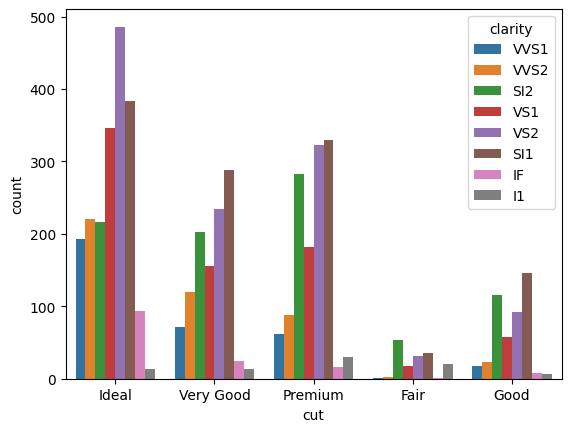

In [23]:
x = 'cut'
y = 'clarity'

sns.countplot(x=x, hue=y, data=df_reduced)
plt.show()


####  Visualizacion COLOR
   - tabla conteo y porcentaja
   - histograma
   - heatmap con 'cut'

,color,procentaje
color,,
G,1044,20.88
E,939,18.78
F,872,17.44
H,750,15.00
D,619,12.38
I,525,10.50
J,251,5.02


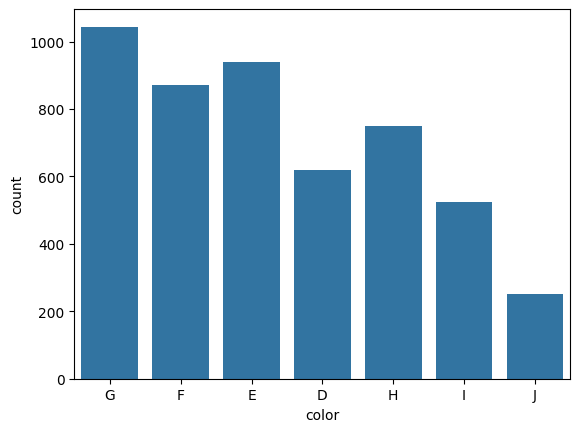

In [24]:
df_color = pd.DataFrame({
    "color": df_reduced['color'].value_counts(),
    "procentaje":(df_reduced['color'].value_counts(normalize=True)*100).round(2)
})
sns.countplot( df_reduced, x ='color')
df_color

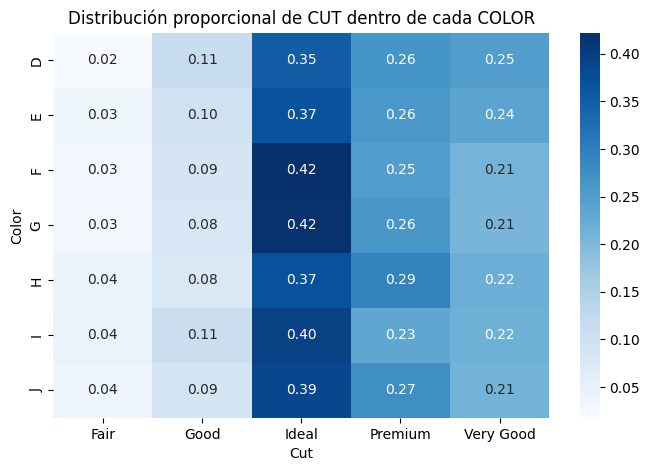

In [25]:
tabla = pd.crosstab(df_reduced['color'], df_reduced['cut'], normalize='index')

plt.figure(figsize=(8,5))
sns.heatmap(tabla, annot=True, cmap='Blues', fmt=".2f")
plt.title('Distribución proporcional de CUT dentro de cada COLOR')
plt.ylabel('Color')
plt.xlabel('Cut')
plt.show()


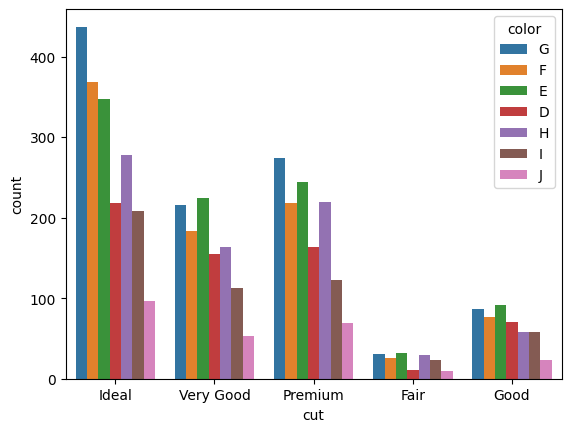

In [26]:
x = 'cut'
y = 'color'

sns.countplot(x=x, hue=y, data=df_reduced)
plt.show()

## CONCLUSIONES [ Ayuda previa a PREPROCESADO]



# SEG X, Y [ UNA FEATURE numerica]

Elegimos 'caract' como base inicial, por tener alta varianza como se ha podido percibir en el EDAs. Tambien contar que tiene una relacion mas lineal con 'price' que podria aportar cierta señal para 'cut.

In [67]:
# Preparamos la feature
X=df_reduced[['carat']]
y=df_reduced['cut']


# Particiononamos los datos para Entrenamiento y test (80-20)
X_train , X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2 , random_state=42, stratify=y)

# Mostramos el reparto X
print(f"Muestras de entrenamiento: {len(X_train)}")
print(f"Muestras de test: {len(X_test)}")

# Mostramos el reparto y 

print(f"Muestras de entrenamiento: {len(y_train)}")
print(f"Muestras de test: {len(y_test)}")


Muestras de entrenamiento: 4000
Muestras de test: 1000
Muestras de entrenamiento: 4000
Muestras de test: 1000


particionamiento correcto.

#### Pipeline

In [94]:
pipeline= make_pipeline(
    SimpleImputer(strategy='median'),
    RobustScaler(),
    LogisticRegression()
)

pipeline.fit(X_train, y_train)
y_pred=pipeline.predict(X_test)

- Matriz e Confusion

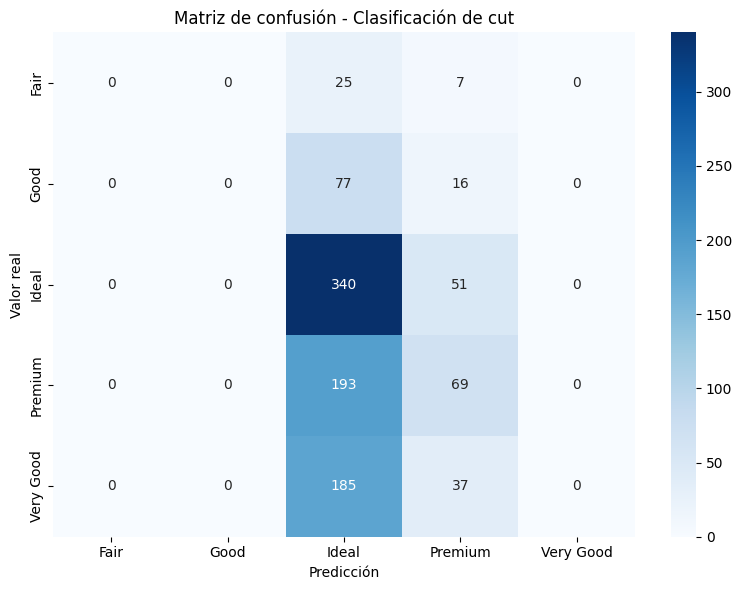

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

labels = sorted(y.unique())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión - Clasificación de cut')
plt.tight_layout()
plt.show()


In [95]:
print('REPORTE DE CLASIFICACION \n')
print(classification_report(y_test, y_pred, target_names=labels, zero_division=0))

print('------------------------------------------------------------------\n')
print('METRICAS DEL MODELO\n')

print(f'accuracy_score {accuracy_score(y_test, y_pred)}')
print(f'balanced_accuracy_score {balanced_accuracy_score(y_test, y_pred):.4f}')
print(f'precision_score {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}')

REPORTE DE CLASIFICACION 

              precision    recall  f1-score   support

        Fair       0.00      0.00      0.00        32
        Good       0.00      0.00      0.00        93
       Ideal       0.41      0.87      0.56       391
     Premium       0.38      0.26      0.31       262
   Very Good       0.00      0.00      0.00       222

    accuracy                           0.41      1000
   macro avg       0.16      0.23      0.17      1000
weighted avg       0.26      0.41      0.30      1000

------------------------------------------------------------------

METRICAS DEL MODELO

accuracy_score 0.409
balanced_accuracy_score 0.2266
precision_score 0.2626


El DataSet no presenta nulos o datos faltantes, vamos a implementar una tecnica de imputer con  mediana ( mas robusta) porque el EDA nos describe una  distribucion  claramente asimetrica a la derecha con una cola bastante larga, y la tendencia central presenta una media mayor que la mediana indice de sesgo por valores grandes, outliers altos ( diamantes muy grandes).

Por el mismo motivo utilizamos un escalado mas robusto frente a Outlier como RobustScaler ya que utiliza la mediana y el rango intercuartilico en vez de media y desviacion estandard.

METRICAS del modelo ( sobre el test):
Las metricas no son muy favorables:
* accuracy muy bajo, indicando que solo el 40% de las prediciones fueron correctas.
* balanced_accuracy, indica que el modelo falla en muchas clases, probablemente por el sesgo que presentan los datos.
* precision, un valor tan bajo nos indica que de las predicciones positivas, muchas son falsas. 

MATRIZ DE CONFUSION :

Es evidente que el modelo esta funcionando muy mal, solo está prediciendo "bien" la clase Ideal y el resto fracasa completamente.
*   recall 0.00 nos esta indicando que nunca predice esas clases ( Fair- Good -Very Good)
*   precison 0.00 nos indica que cuando predice nunca acierta las clases ( siguen siendo las mismas)
*   f1 0.00 que es la media entre recall y precision , nos indica que no hay equilibrio entre las dos metricas

Conclusion: el modelo solo aprende por la Clase Ideal e ignora el resto de clases. Solo con los datos de carat el rendimiento es muy bajo y es neceario probar añadiendo mas feature y probando otros modelos. Dado los malos resultado no es necesario realizar una validacion cruzada 


# SEG X, T [ VARIAS FEATURE]

Procedemos a incorporar depth por tener una distribucuion normal, aunque en el EDAs mostró poca relacion con 'cut' 

#### Entrenamiento - Validacion Cruzada

# SEG X, Y [ UNA FEATURE categorica ]

Probamos ahora con una variable categorica, tal vez mas relacionada con la variable dependiente  'cut' y elegimos 'clarity' porque aparentemente parece guardar una mejor distribucion respecto a cada variable 'cut'.

#### Preprocesado

#### Entrenamiento - Validacion Cruzada

#### Metricas

# Segmentacion  X , y

In [28]:
X = df_reduced [['price', 'carat', 'depth', 'table', 'x', 'y', 'z', 'color', 'clarity']]
y = df_reduced ['cut']


# Train_test-split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42 , stratify=y)

# DISTRIBUCION DE LOS DATOS ENTRE TRAIN Y TEST

train_dist = y_train.value_counts(normalize=True).rename("Train %")
test_dist = y_test.value_counts(normalize=True).rename("Test %")

dist_df = pd.concat([train_dist, test_dist], axis=1) * 100
dist_df

,Train %,Test %
cut,,
Ideal,39.05,39.1
Premium,26.25,26.2
Very Good,22.15,22.2
Good,9.30,9.3
Fair,3.25,3.2


# PREPROCESADO - PIPELINE

- Objetivos. mejorar los datos aun mas,  para que le modelado vaya mejor.

- Realizaremos el preprocesado utilizando pipeline ( no de forma manuela ) 

- Tecnicas:
   Impute (nulos) / 
   Scaler (escalar datso numericos )/ 
   encoder (para codificar categoricas) / 
   trasformer ( elimina sesgo en distribuciones) / 
   PCA ( reducion de dimensionalidad, reduciento numero de feature) / 
   Custom trasformer ( customizar tu propio trasformer, por ejemplo para corregir outlier o crear una nueva columnas ) / 
   SMOTE ( para balancear clase desbalanceo)  

IMPORTATNE: aqui falta añadir un SMOTE para el balanceo + un trasformer personalizado para los outlier 

In [30]:
# Transformer personalizado para capear o reemplazar outliers por mediana
from sklearn.base import BaseEstimator, TransformerMixin

class OutlierCapper(BaseEstimator, TransformerMixin):
    def __init__(self, method='iqr', factor=1.5, strategy='cap'):
        """
        method: 'iqr' (actual) o 'zscore' (no implementado ahora)
        strategy: 'cap' -> clip a [lower,upper]; 'median' -> reemplazar outlier por mediana
        """
        self.method = method
        self.factor = factor
        self.strategy = strategy

    def fit(self, X, y=None):
        X = pd.DataFrame(X).copy()
        self.cols_ = X.columns
        self.q1_ = X.quantile(0.25)
        self.q3_ = X.quantile(0.75)
        iqr = self.q3_ - self.q1_
        self.lower_ = self.q1_ - self.factor * iqr
        self.upper_ = self.q3_ + self.factor * iqr
        self.median_ = X.median()
        return self

    def transform(self, X):
        X = pd.DataFrame(X).copy()
        for c in self.cols_:
            low = self.lower_[c]
            up = self.upper_[c]
            if self.strategy == 'cap':
                X[c] = X[c].clip(lower=low, upper=up)
            else:  # median
                mask = (X[c] < low) | (X[c] > up)
                X.loc[mask, c] = self.median_[c]
        return X.values
    
# Incluir en el pipeline numérico
numerical_cols = X_train.select_dtypes(include=[np.number]).columns
pipeline_numerical = make_pipeline(
    OutlierCapper(method='iqr', factor=1.5, strategy='cap'),  # o strategy='median'
    SimpleImputer(strategy='median'),
    MinMaxScaler(),
)

In [31]:
numerical_cols = X_train.select_dtypes(include=[np.number]).columns
pipeline_numerical = make_pipeline(
    SimpleImputer(strategy='median'),   # para un pipe mas robusto frente a valores nulos
    KNNImputer(n_neighbors=7),
    StandardScaler
)

# pipeline categóricas
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns
pipeline_categorical = make_pipeline(
    SimpleImputer(strategy='most_frequent'),     # para un pipe mas robusto frente a valores nulos
    OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # codifica categoricas # hand_unkown en caso de entrada de un dato no conocido precedentemente
)

# unir pipelines con ColumnTransformer unir cols num y cat
pipeline_all = ColumnTransformer([
    ('numeric', pipeline_numerical, numerical_cols),
    ('categorical', pipeline_categorical, categorical_cols)
])

# pipeline final con el modelo
pipeline = make_pipeline(
    pipeline_all,
    LogisticRegression()
)
# pipeline2 = make_pipeline(
#     pipeline_all,
#     KNeighborsClassifier()
# )
pipeline

TypeError: _HTMLDocumentationLinkMixin._get_doc_link() missing 1 required positional argument: 'self'

TypeError: _HTMLDocumentationLinkMixin._get_doc_link() missing 1 required positional argument: 'self'

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('knnimputer',
                                                                   KNNImputer(n_neighbors=7)),
                                                                  ('type',
                                                                   <class 'sklearn.preprocessing._data.StandardScaler'>)]),
                                                  Index(['price', 'carat', 'depth', 'table', 'x', 'y', 'z'], dtype='str')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   

# Entrenamiento
 - probar min. dos mdelos. LogistRegression , KNeightborClassifiar 
 - probar para cada modelo diferentes metricas. 

In [32]:
model = LogisticRegression()

# Metrica

In [33]:
def evaluar_clasificador(y_real, y_pred, y_proba=None, nombres_clases=None):
    """
    Evalúa un clasificador con múltiples métricas.
    
    Args:
        y_real: etiquetas reales
        y_pred: predicciones del modelo
        y_proba: probabilidades (opcional, para AUC)
        nombres_clases: nombres de las clases (opcional)
    """
    print("=" * 50)
    print("EVALUACIÓN DEL CLASIFICADOR")
    print("=" * 50)
    
    # Métricas básicas
    print(f"\nAccuracy:  {accuracy_score(y_real, y_pred):.4f}")
    print(f"Precision: {precision_score(y_real, y_pred, average='weighted'):.4f}")
    print(f"Recall:    {recall_score(y_real, y_pred, average='weighted'):.4f}")
    print(f"F1-score:  {f1_score(y_real, y_pred, average='weighted'):.4f}")
    
    # AUC si hay probabilidades
    if y_proba is not None:
        n_clases = len(np.unique(y_real))
        if n_clases == 2:
            auc = roc_auc_score(y_real, y_proba)
            print(f"AUC-ROC:   {auc:.4f}")
        else:
            auc = roc_auc_score(y_real, y_proba, multi_class='ovr')
            print(f"AUC-ROC (OvR): {auc:.4f}")
    
    # Matriz de confusión
    print("\nMatriz de confusión:")
    print(confusion_matrix(y_real, y_pred))
    
    # Reporte completo
    print("\nReporte detallado:")
    print(classification_report(y_real, y_pred, target_names=nombres_clases))

# Ejemplo de uso
# evaluar_clasificador(
#     y_test, y_pred,
#     y_proba=proba,
#     nombres_clases=['Benigno', 'Maligno']
# )

# Validacion cruzada

valida los modelos. 

ATENCION . RECUERDA QUE SE PUEDE HACER VALIDADCION CRUZADA DENTRO DEL PIPELINE ( ver el notebook 03-pipeline )

# Pipeline completo
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('clasificador', LogisticRegression(max_iter=1000))
])

# Validación cruzada: el preprocesamiento está DENTRO de cada fold
scores = cross_val_score(pipe, X, y, cv=5)

print(f"Scores por fold: {scores.round(4)}")
print(f"Media: {scores.mean():.4f} (+/- {scores.std():.4f})") 
#  calcula el scroe promedio, entre todos los scores 

In [41]:
#results = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
#print('accuracy cv', results.mean())

#### Grafica de comparacion de modelos segun metricas. 

In [ ]:
# Simular métricas de varios modelos
modelos = ['Logística', 'KNN', 'Random Forest']

#  AQUI PONE VALORES DE FORMA MANUAL . PROVIO A OBTENEIDO VALORES DE METRICAS PRO CADA MODELO

# PODRIAMSO RESOLVER PONIENDO LOS RESUTLADOS EN UN DATA FRAME Y ASI IMPRIMO ESOS. 

metricas = {
    'Accuracy': [0.95, 0.93, 0.97],
    'Precision': [0.95, 0.92, 0.96],
    'Recall': [0.94, 0.94, 0.98],
    'F1-score': [0.94, 0.93, 0.97]
}

# Crear gráfico de barras agrupadas
x = np.arange(len(modelos))
width = 0.2
fig, ax = plt.subplots(figsize=(12, 6))

colores = ['steelblue', 'coral', 'mediumseagreen', 'orchid']
for i, (metrica, valores) in enumerate(metricas.items()):
    ax.bar(x + i * width, valores, width, label=metrica, color=colores[i])

ax.set_ylabel('Valor')
ax.set_title('Comparación de métricas por modelo')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(modelos)
ax.legend()
ax.set_ylim(0.85, 1.0)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Ajustes de Hiperparametros

# Evauacion Final

# Evaluacion Final en Test

-   nota: recuerda que puedes utilizar el predict_proba ( )para ver la probabilidad de que occurra por cada clase ( revisa el notebook de regresion-logistica) 

# Interpretacion - Evaluacion Final

# Conclusiones

In [ ]:
# EMBEDINGS 

# CON EL PIPELINE SEPARAREMOS TRASFORMACIONES SEGUN SEAN NUMERICAS( IMPUTER +SCALER pro ejemplo)  O CATEGORICAS ( imputer + encoder)
# esto scikit leanr lo agurpa en una unica matriz qeu se lo pasara al modelo 
# DESPUES PODEMOS CONSIDERAR HACER UN GRAFICO DE CALAR CON LA CORRELACION ENTRE VARIABLES + UN BARPLOT (GRAFICO DE BARRAS) PONIENDO LA COLUMNA QUE NOS INTERESA EN ESTE CASO SERA CUT CON EL RESTO 
# RECUERDA que ene ste ultimo grafico los valores mas cercano a uo son los que teiene mas correlacion.
# revisar tambien la Multicolinealidad ( es decir relaciones fuertes entre variables de X ) . hay solucines para esto  revisa el motebook de regresion multiple

# agrega columnas nuevas. En nuestro caso podria valer para cut, color y clarity
# evitamos hacer un map para que no se genere una cierta ordenacion con peos distintos 

-  revision rapida para ver lso datos de X y y para ver overfitng y underfiting 

In [ ]:
# PREPAR FEATURE Y TARGET

# X= df_reduced[[pongo la o las fetaure que considere]]   --> RECUERDA HACERLO POR PARTES, ES DECRI PRIMERO UNA Y DESPUES IR AÑADIENDOLE
# y = df_reduced['cut']

                # AQUI PODEMOS UTILIZAR EL SISTEMA MMONDTADO EN LA UNIDA 1 O EN LOS APUNTES DE REGRESION_MULTIMPLE_MPG donde hace un bucle for de predictores 
                # es interesante probar primero un modelo añadiendoles poco a podo datos de entrad
                # posteriormente podemos poner mas modelos y comparar. Ver aunque sea de regestion lineal , el notebook de penguins 
                #               
# HAGO EL TRAIN TEST SPLIT

# HAGO LA VALIDACION CON 
                # cross_val_score
                # cross_validate  -->  nos da info de cuanto tiempo tarda en entrenar y predecir. ES MUY IMPORTANTE PROQUE POR EJEMPO CUANTO MAS COLUMNAS HAYA MAS TARDE  

# entreno el modelo

# hago prediciones sobre el modelo
        # y_pred = modelo.predict(X_train)
        # y_pred =,odelo.predict (X_test)
        # esto lo hacemos para valorar si tenemos overfiting o underfitting. Es la forma de comparar y ver si hay mucha diferencia. 
        # tambien podramos graficar los residuos ( añade residuo vs prediciones, etc ) para revelar over, under etc. 


# calculo las metricas . SON EL RESUMEN DE TODOS LOs RESIDUOS. cUANTO MAS CERCANS A ZERO  MEJOR  
# evaluo 


# PREPARACION X,y

In [ ]:
## Función de verificación para ver distribucion entre train y test 

# def verificar_division(y_train, y_test, nombre_target="target"):
#     """Verifica que la división mantiene proporciones similares."""
#     print(f"Verificación de la división:")
#     print(f"  Muestras train: {len(y_train)}")
#     print(f"  Muestras test: {len(y_test)}")
#     print(f"  Ratio test: {len(y_test) / (len(y_train) + len(y_test)):.2%}")
#     
#     if hasattr(y_train, 'value_counts'):  # pandas Series
#         print(f"\n  Distribución en train:\n{y_train.value_counts(normalize=True)}")
#         print(f"\n  Distribución en test:\n{y_test.value_counts(normalize=True)}")
# 
# # Usar la función
# verificar_division(pd.Series(y_train), pd.Series(y_test))

# Dentro del flujo de tragbajao recomnedado tenenmos el cross_val-score para valorar los modelos y decidir seguir o cambiar de modelos.

 df
* X, y
* train_test_split --> X_train, X_test, y_train, y_test
* OPCIONAL( noe sobligatorio es solo apra entender mejor el modelo ) : cross_val_score(modelo, X_train, y_train) --> ver scores y decidir si cambiar de Algoritmo o va bien
  * opcionalmente: visualizar en boxplot los scores 8 tiene que ver algun que ootro notebook que lo muestre como hacerlo 

* Entrenamiento:
  * model.fit(X_train, y_train)   entrenamos con todos los datos de entrenamiento.

* Predicción:
  * Opción 1: model.score(X_test, y_test) (solo da una métrica, r2 o accuracy)
  
  * Opción 2: 
    * y_pred = model.predict(X_test)   -->  despues calcularemos los score ( o metrica)  que queremos de forma manual. 
    ejemplos: 
    * r2_score(y_test, y_pred)     
    * mean_absolute_error(y_test, y_pred)

* Si todo OK y queremos preparar el modelo para producción
  * model.fit(X, y) --> entrenamos con todos los datos. 

In [ ]:
# Cargar datos
#   cancer = load_breast_cancer()
#   X, y = cancer.data, cancer.target
#   
#   # Definir validación cruzada estratificada
#   cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#   
#   # Modelos a comparar
#   modelos = {
#       'Logistic Regression': LogisticRegression(max_iter=10000),
#       'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
#       'Decision Tree': DecisionTreeClassifier(random_state=42)
#   }
#   
#   # Evaluar cada modelo
#   resultados = []
#   for nombre, modelo in modelos.items():
#       scores = cross_val_score(modelo, X, y, cv=cv, scoring='accuracy')
#       resultados.append({
#           'Modelo': nombre,
#           'Accuracy Media': scores.mean(),
#           'Std': scores.std(),
#           'Min': scores.min(),
#           'Max': scores.max()
#       })
#   
#   # Mostrar resultados
#   df_resultados = pd.DataFrame(resultados)
#   df_resultados = df_resultados.sort_values('Accuracy Media', ascending=False)
#   print(df_resultados.to_string(index=False))